In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('meta_game_sales.csv', sep=';', encoding='utf-8')
df.head()

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
0,8,Grand Theft Auto V,Rockstar Games,Rockstar North,PS4,PlayStation 4,19390000.0,Action,97,8.3,18,11,2014
1,20,Grand Theft Auto V,Rockstar Games,Rockstar North,XOne,PlayStation 4,8720000.0,Action,97,8.3,18,11,2014
2,8,Grand Theft Auto V,Rockstar Games,Rockstar North,PS4,Xbox One,19390000.0,Action,97,7.8,18,11,2014
3,20,Grand Theft Auto V,Rockstar Games,Rockstar North,XOne,Xbox One,8720000.0,Action,97,7.8,18,11,2014
4,44,Grand Theft Auto III,Rockstar Games,Rockstar North,All,PlayStation 2,NaN,Action-Adventure,97,8.4,22,10,2001


In [8]:
df.publisher.unique()

array(['Rockstar Games', 'Sony Computer Entertainment', 'LucasArts',
       'Ubisoft', 'Warner Bros. Interactive',
       'Warner Bros. Interactive Entertainment', 'Capcom',
       'Electronic Arts', 'Activision', 'Eidos Interactive', 'Atari',
       'THQ', 'Deep Silver', 'Sony Interactive Entertainment', 'Konami',
       'Square Enix', 'Bethesda Softworks', 'Vivendi Games',
       'Disney Interactive Studios', '2K Games', 'Namco',
       'Konami Digital Entertainment', 'Hasbro Interactive', 'Nintendo',
       'Microsoft Game Studios', 'D3 Publisher', 'Sega',
       'Black Label Games', 'Midway Games', 'Universal Interactive',
       'KOEI', 'Square', 'Tecmo Koei', 'Gearbox Software', 'Namco Bandai',
       'Majesco', 'Gathering of Developers', 'Bandai', 'TDK Mediactive',
       'Microsoft Studios', 'Hello Games', 'Nordic Games', '505 Games',
       'Maximum Games', 'Sony Computer Entertainment Europe',
       'Studio Wildcard', 'Modus Games', 'PlayWay'], dtype=object)

In [28]:
df.describe()

,rank_sales,global_sales,meta_critic_score,release_day,release_month,release_year
count,905.000000,7.470000e+02,905.000000,905.000000,905.000000,905.000000
mean,432.278453,1.432825e+06,73.034254,15.516022,7.643094,2010.361326
std,347.466994,1.889352e+06,12.204831,8.304361,3.208417,4.387337
min,5.000000,1.000000e+04,29.000000,1.000000,1.000000,2000.000000
25%,181.000000,4.550000e+05,67.000000,10.000000,5.000000,2008.000000
50%,365.000000,8.700000e+05,75.000000,15.000000,9.000000,2010.000000
75%,554.000000,1.570000e+06,81.000000,22.000000,10.000000,2013.000000
max,1946.000000,1.939000e+07,98.000000,31.000000,12.000000,2019.000000


In [5]:
companies = ['Sony', 'Microsoft', 'Rockstar', 'CD Projekt Red']

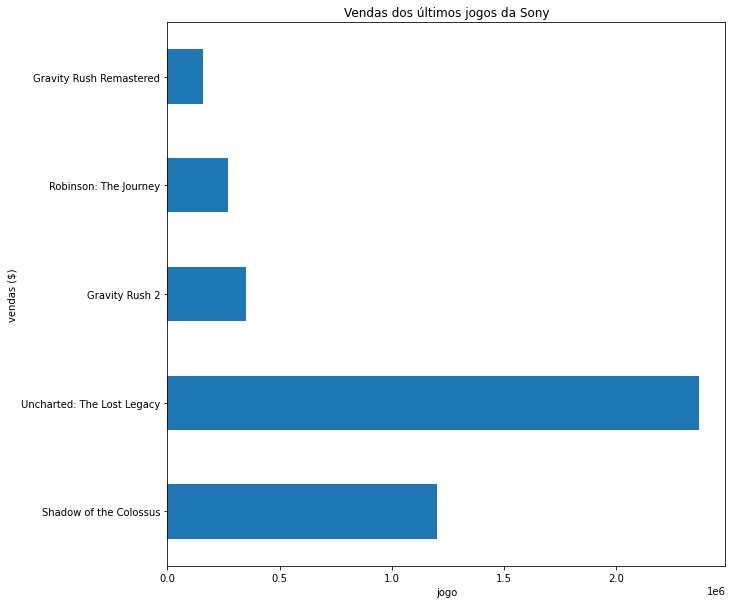

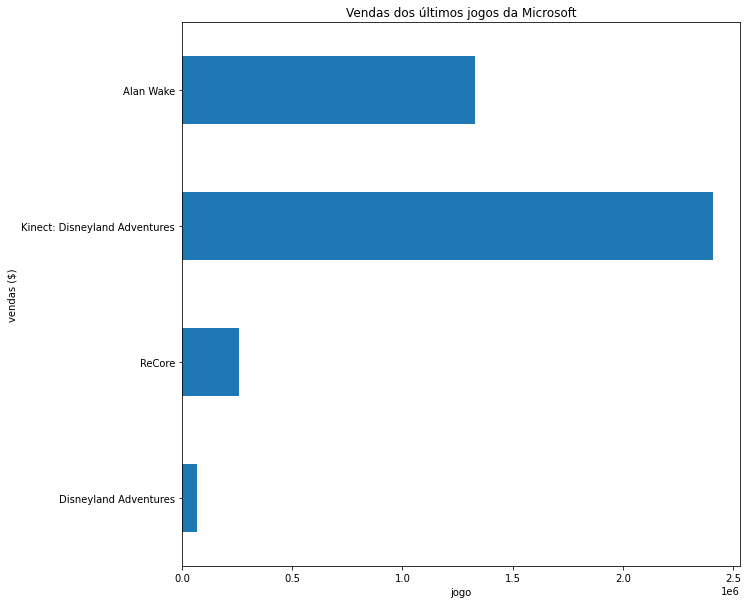

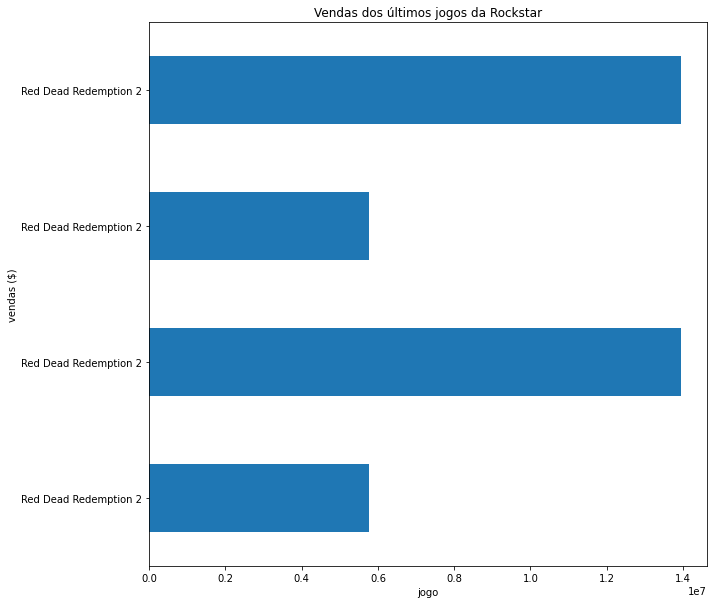

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
686,48,Red Dead Redemption 2,Rockstar,Rockstar Games,PS4,Xbox One,13940000.0,Action-Adventure,97,8.1,26,10,2018
683,48,Red Dead Redemption 2,Rockstar,Rockstar Games,PS4,PlayStation 4,13940000.0,Action-Adventure,97,8.6,26,10,2018
687,109,Red Dead Redemption 2,Rockstar,Rockstar Games,XOne,Xbox One,5770000.0,Action-Adventure,97,8.1,26,10,2018
684,109,Red Dead Redemption 2,Rockstar,Rockstar Games,XOne,PlayStation 4,5770000.0,Action-Adventure,97,8.6,26,10,2018
249,147,Uncharted: The Lost Legacy,Sony,Naughty Dog,PS4,PlayStation 4,2370000.0,Action,84,8.0,22,8,2017
716,188,Kinect: Disneyland Adventures,Microsoft,Frontier Developments,X360,Xbox 360,2410000.0,Action-Adventure,73,3.2,15,11,2011
769,245,Shadow of the Colossus,Sony,Bluepoint Games,PS4,PlayStation 4,1200000.0,Action-Adventure,91,7.8,6,2,2018
373,283,Alan Wake,Microsoft,Remedy Entertainment,X360,Xbox 360,1330000.0,Action,83,8.2,18,5,2010
822,375,Gravity Rush 2,Sony,SIE Japan Studio,PS4,PlayStation 4,350000.0,Action-Adventure,80,8.1,20,1,2017
839,412,Robinson: The Journey,Sony,Crytek,PS4,PlayStation 4,270000.0,Action-Adventure,64,6.6,8,11,2016


In [29]:
datas = []
for i in range(len(companies)-1):
    comp = pd.DataFrame(df.loc[df['publisher'].str.contains(companies[i])])
    comp = comp.sort_values(by='release_year', ascending=False)[:5]
    comp = comp.dropna()
    ax = comp.plot.barh(x='game_name', y='global_sales', title=f'Vendas dos últimos jogos da {companies[i]}', legend=False, figsize=(10,10))
    ax.set_xlabel('jogo')
    ax.set_ylabel('vendas ($)')
    plt.savefig(f'vendas_{companies[i]}.png')
    plt.show()
    datas.append(comp) # adicionando na lista de dataframes para os ultimos 5 jogos de cada companhia
    companies_df = pd.concat(datas)
    
companies_df.sort_values(by='rank_sales', ascending=True, inplace=True)
companies_df

In [12]:
# companies_df['global_sales'].dropna
companies_df[companies_df['publisher'].str.contains('Rockstar')]

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
686,48,Red Dead Redemption 2,Rockstar Games,Rockstar Games,PS4,Xbox One,13940000.0,Action-Adventure,97,8.1,26,10,2018
683,48,Red Dead Redemption 2,Rockstar Games,Rockstar Games,PS4,PlayStation 4,13940000.0,Action-Adventure,97,8.6,26,10,2018
687,109,Red Dead Redemption 2,Rockstar Games,Rockstar Games,XOne,Xbox One,5770000.0,Action-Adventure,97,8.1,26,10,2018
684,109,Red Dead Redemption 2,Rockstar Games,Rockstar Games,XOne,PlayStation 4,5770000.0,Action-Adventure,97,8.6,26,10,2018


In [13]:
companies_df.replace({'publisher': {'Sony Interactive Entertainment': 'Sony', 'Sony Computer Entertainment': 'Sony'}}, inplace=True)
companies_df

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
686,48,Red Dead Redemption 2,Rockstar Games,Rockstar Games,PS4,Xbox One,13940000.0,Action-Adventure,97,8.1,26,10,2018
683,48,Red Dead Redemption 2,Rockstar Games,Rockstar Games,PS4,PlayStation 4,13940000.0,Action-Adventure,97,8.6,26,10,2018
687,109,Red Dead Redemption 2,Rockstar Games,Rockstar Games,XOne,Xbox One,5770000.0,Action-Adventure,97,8.1,26,10,2018
684,109,Red Dead Redemption 2,Rockstar Games,Rockstar Games,XOne,PlayStation 4,5770000.0,Action-Adventure,97,8.6,26,10,2018
249,147,Uncharted: The Lost Legacy,Sony,Naughty Dog,PS4,PlayStation 4,2370000.0,Action,84,8.0,22,8,2017
716,188,Kinect: Disneyland Adventures,Microsoft Studios,Frontier Developments,X360,Xbox 360,2410000.0,Action-Adventure,73,3.2,15,11,2011
769,245,Shadow of the Colossus,Sony,Bluepoint Games,PS4,PlayStation 4,1200000.0,Action-Adventure,91,7.8,6,2,2018
373,283,Alan Wake,Microsoft Game Studios,Remedy Entertainment,X360,Xbox 360,1330000.0,Action,83,8.2,18,5,2010
822,375,Gravity Rush 2,Sony,SIE Japan Studio,PS4,PlayStation 4,350000.0,Action-Adventure,80,8.1,20,1,2017
839,412,Robinson: The Journey,Sony,Crytek,PS4,PlayStation 4,270000.0,Action-Adventure,64,6.6,8,11,2016


In [17]:
df.replace({'publisher': {'Sony Interactive Entertainment': 'Sony', 'Sony Computer Entertainment': 'Sony', 'Microsoft Game Studios': 'Microsoft', 'Microsoft Studios': 'Microsoft', 'Rockstar Games': 'Rockstar'}}, inplace=True)
df

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
0,8,Grand Theft Auto V,Rockstar,Rockstar North,PS4,PlayStation 4,19390000.0,Action,97,8.3,18,11,2014
1,20,Grand Theft Auto V,Rockstar,Rockstar North,XOne,PlayStation 4,8720000.0,Action,97,8.3,18,11,2014
2,8,Grand Theft Auto V,Rockstar,Rockstar North,PS4,Xbox One,19390000.0,Action,97,7.8,18,11,2014
3,20,Grand Theft Auto V,Rockstar,Rockstar North,XOne,Xbox One,8720000.0,Action,97,7.8,18,11,2014
4,44,Grand Theft Auto III,Rockstar,Rockstar North,All,PlayStation 2,NaN,Action-Adventure,97,8.4,22,10,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,1480,Agony,PlayWay,Madmind Studio,PC,Xbox One,NaN,Action,34,4.3,29,5,2018
901,390,Agony,PlayWay,Madmind Studio,All,Xbox One,NaN,Action-Adventure,34,4.3,29,5,2018
902,391,Agony,PlayWay,Madmind Studio,Series,Xbox One,NaN,Action-Adventure,34,4.3,29,5,2018
903,585,Agony,Maximum Games,Madmind Studio,PS4,Xbox One,30000.0,Action-Adventure,34,4.3,29,5,2018


In [18]:
df['publisher'].unique()

array(['Rockstar', 'Sony', 'LucasArts', 'Ubisoft',
       'Warner Bros. Interactive',
       'Warner Bros. Interactive Entertainment', 'Capcom',
       'Electronic Arts', 'Activision', 'Eidos Interactive', 'Atari',
       'THQ', 'Deep Silver', 'Konami', 'Square Enix',
       'Bethesda Softworks', 'Vivendi Games',
       'Disney Interactive Studios', '2K Games', 'Namco',
       'Konami Digital Entertainment', 'Hasbro Interactive', 'Nintendo',
       'Microsoft', 'D3 Publisher', 'Sega', 'Black Label Games',
       'Midway Games', 'Universal Interactive', 'KOEI', 'Square',
       'Tecmo Koei', 'Gearbox Software', 'Namco Bandai', 'Majesco',
       'Gathering of Developers', 'Bandai', 'TDK Mediactive',
       'Hello Games', 'Nordic Games', '505 Games', 'Maximum Games',
       'Sony Computer Entertainment Europe', 'Studio Wildcard',
       'Modus Games', 'PlayWay'], dtype=object)

In [19]:
df_c = df.loc[df['publisher'].isin(companies)]
df_c

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
0,8,Grand Theft Auto V,Rockstar,Rockstar North,PS4,PlayStation 4,19390000.0,Action,97,8.3,18,11,2014
1,20,Grand Theft Auto V,Rockstar,Rockstar North,XOne,PlayStation 4,8720000.0,Action,97,8.3,18,11,2014
2,8,Grand Theft Auto V,Rockstar,Rockstar North,PS4,Xbox One,19390000.0,Action,97,7.8,18,11,2014
3,20,Grand Theft Auto V,Rockstar,Rockstar North,XOne,Xbox One,8720000.0,Action,97,7.8,18,11,2014
4,44,Grand Theft Auto III,Rockstar,Rockstar North,All,PlayStation 2,NaN,Action-Adventure,97,8.4,22,10,2001
5,15,Grand Theft Auto IV,Rockstar,Rockstar North,X360,Xbox 360,11090000.0,Action,98,7.9,29,4,2008
6,16,Grand Theft Auto IV,Rockstar,Rockstar North,PS3,Xbox 360,10570000.0,Action,98,7.9,29,4,2008
7,15,Grand Theft Auto IV,Rockstar,Rockstar North,X360,PlayStation 3,11090000.0,Action,98,7.8,29,4,2008
8,16,Grand Theft Auto IV,Rockstar,Rockstar North,PS3,PlayStation 3,10570000.0,Action,98,7.8,29,4,2008
9,81,Grand Theft Auto: Liberty City Stories,Rockstar,Rockstar Leeds/North,All,PSP\t\t,NaN,Action-Adventure,88,7.8,24,10,2005


In [ ]:
ax = df_c.groupby(['publisher']).sum().plot(kind='pie', y='global_sales', legend=False, autopct='%1.1f%%', 
                                                title='Vendas das principais companhias', figsize=(10,8))
ax.set_ylabel('')
plt.savefig('vendas_totais.png')
plt.show()

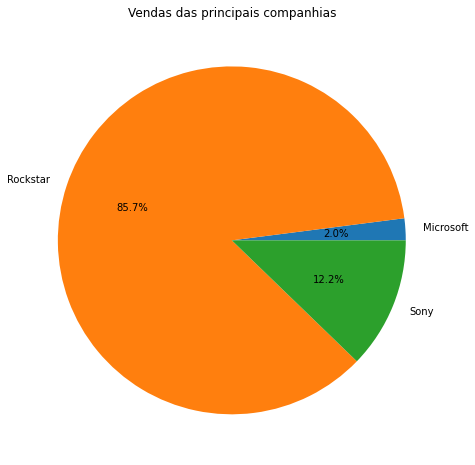

In [24]:
ax = df_c.groupby(['publisher']).sum().plot(kind='pie', y='global_sales', legend=False, autopct='%1.1f%%', 
                                                title='Vendas das principais companhias', figsize=(10,8))
ax.set_ylabel('')
plt.savefig('vendas_totais.png')
plt.show()

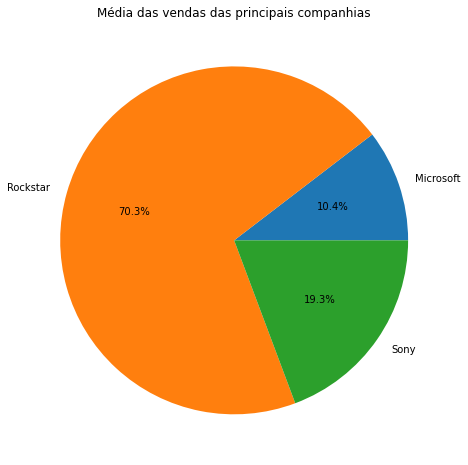

In [26]:
ax = df_c.groupby(['publisher']).mean().plot(kind='pie', y='global_sales', legend=False, autopct='%1.1f%%', 
                                                title='Média das vendas das principais companhias', figsize=(10,8))
ax.set_ylabel('')
plt.savefig('media_das_vendas.png')
plt.show()

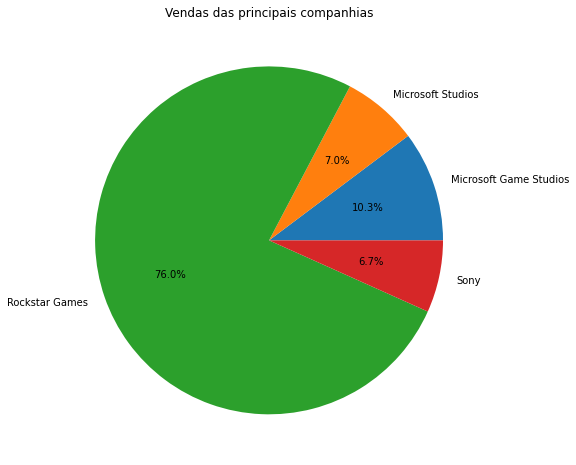

In [14]:
ax = companies_df.groupby(['publisher']).mean().plot(kind='pie', y='global_sales', legend=False, autopct='%1.1f%%', 
                                                title='Vendas das principais companhias', figsize=(10,8))
ax.set_ylabel('')

# plt.legend(False)
plt.savefig('media_vendas_companhias.png')
plt.show()

In [37]:
mean = companies_df.groupby(['publisher']).mean()
mean[['global_sales', 'meta_critic_score']]

,global_sales,meta_critic_score
publisher,,
Microsoft,1017500.0,71.5
Rockstar,9855000.0,97.0
Sony,870000.0,79.8


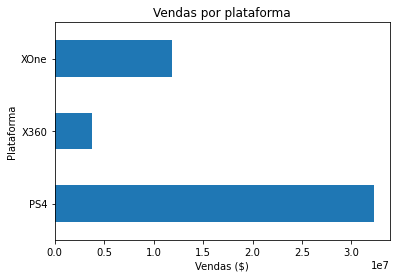

In [74]:
# sony = df[df['publisher'] == 'Sony']
ax = companies_df.groupby(['platform']).sum().plot.barh( y='global_sales', legend=False, title='Vendas por plataforma')
ax.set_ylabel('Plataforma')
ax.set_xlabel('Vendas ($)')
plt.savefig('vendas_plataforma.png')
plt.show()

In [16]:
companies_df['meta_user_score'] = companies_df.meta_user_score.astype('float64')

array([<AxesSubplot:title={'center':'meta_critic_score'}, xlabel='game_name'>],
      dtype=object)

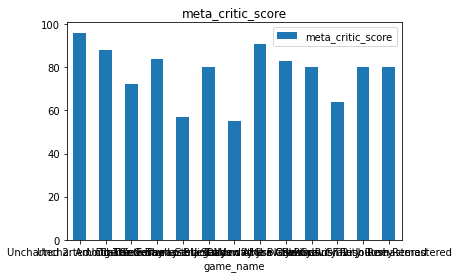

In [58]:
companies_df.plot.bar(x='game_name', y='meta_critic_score', rot=0, subplots=True)

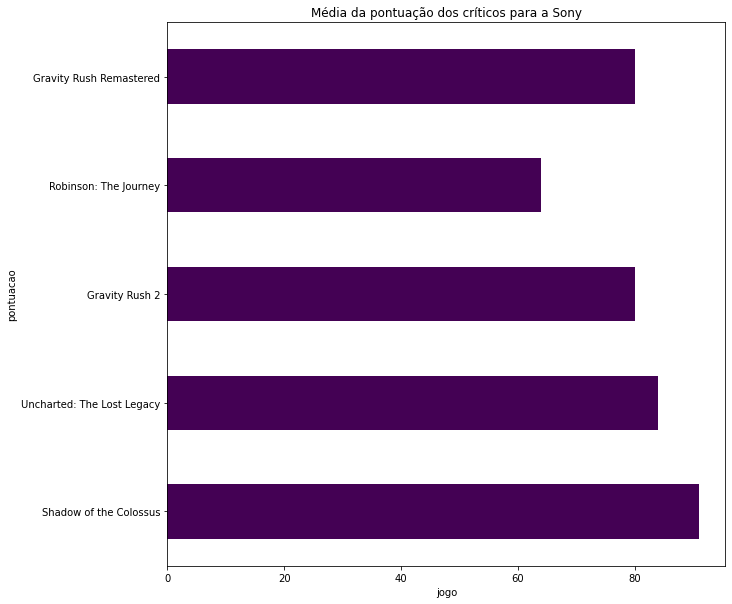

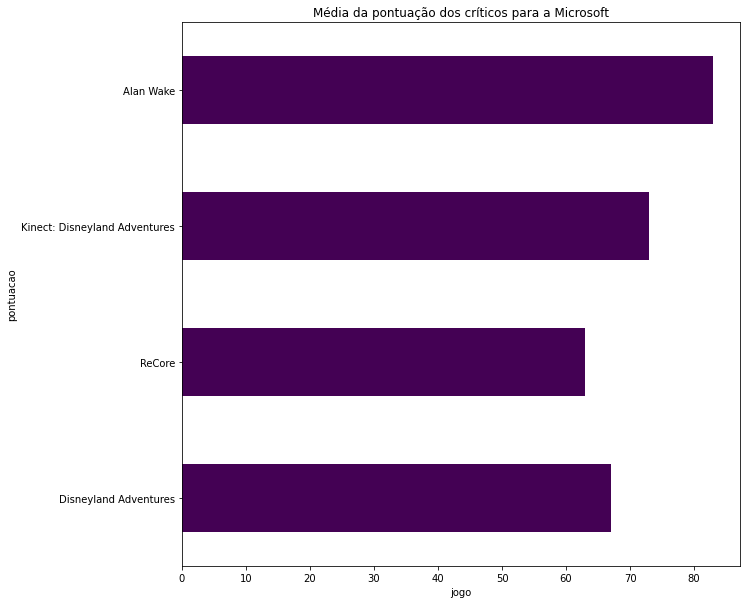

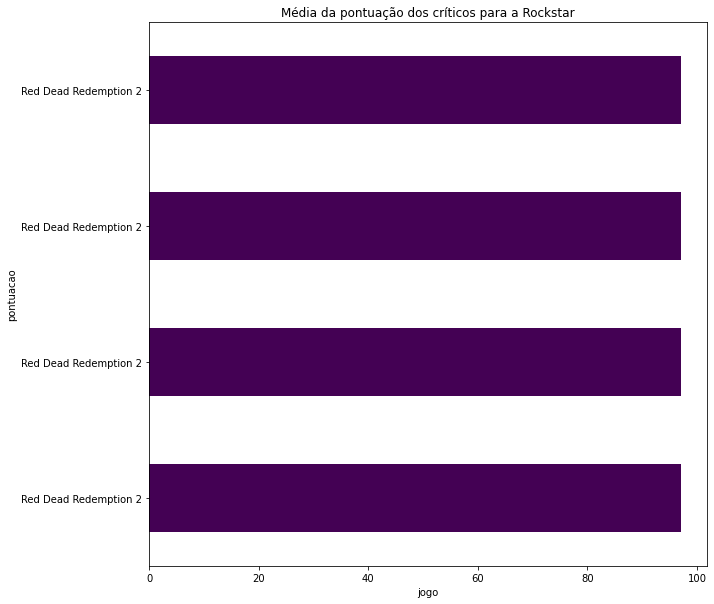

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
686,48,Red Dead Redemption 2,Rockstar,Rockstar Games,PS4,Xbox One,13940000.0,Action-Adventure,97,8.1,26,10,2018
683,48,Red Dead Redemption 2,Rockstar,Rockstar Games,PS4,PlayStation 4,13940000.0,Action-Adventure,97,8.6,26,10,2018
687,109,Red Dead Redemption 2,Rockstar,Rockstar Games,XOne,Xbox One,5770000.0,Action-Adventure,97,8.1,26,10,2018
684,109,Red Dead Redemption 2,Rockstar,Rockstar Games,XOne,PlayStation 4,5770000.0,Action-Adventure,97,8.6,26,10,2018
249,147,Uncharted: The Lost Legacy,Sony,Naughty Dog,PS4,PlayStation 4,2370000.0,Action,84,8.0,22,8,2017
716,188,Kinect: Disneyland Adventures,Microsoft,Frontier Developments,X360,Xbox 360,2410000.0,Action-Adventure,73,3.2,15,11,2011
769,245,Shadow of the Colossus,Sony,Bluepoint Games,PS4,PlayStation 4,1200000.0,Action-Adventure,91,7.8,6,2,2018
373,283,Alan Wake,Microsoft,Remedy Entertainment,X360,Xbox 360,1330000.0,Action,83,8.2,18,5,2010
822,375,Gravity Rush 2,Sony,SIE Japan Studio,PS4,PlayStation 4,350000.0,Action-Adventure,80,8.1,20,1,2017
839,412,Robinson: The Journey,Sony,Crytek,PS4,PlayStation 4,270000.0,Action-Adventure,64,6.6,8,11,2016


In [57]:
datas = []
for i in range(len(companies)-1):
    comp = pd.DataFrame(df.loc[df['publisher'].str.contains(companies[i])])
    comp = comp.sort_values(by='release_year', ascending=False)[:5]
    comp = comp.dropna()
    ax = comp.plot.barh(x='game_name', y=['meta_critic_score', 'meta_user_score'], cmap='viridis', title=f'Média da pontuação dos críticos para a {companies[i]}', legend=False, figsize=(10,10))
    ax.set_xlabel('jogo')
    ax.set_ylabel('pontuacao')
    plt.savefig(f'media_pontuacao_criticos_{companies[i]}.png')
    plt.show()
    datas.append(comp) # adicionando na lista de dataframes para os ultimos 5 jogos de cada companhia
    companies_df = pd.concat(datas)
    
companies_df.sort_values(by='rank_sales', ascending=True, inplace=True)
companies_df

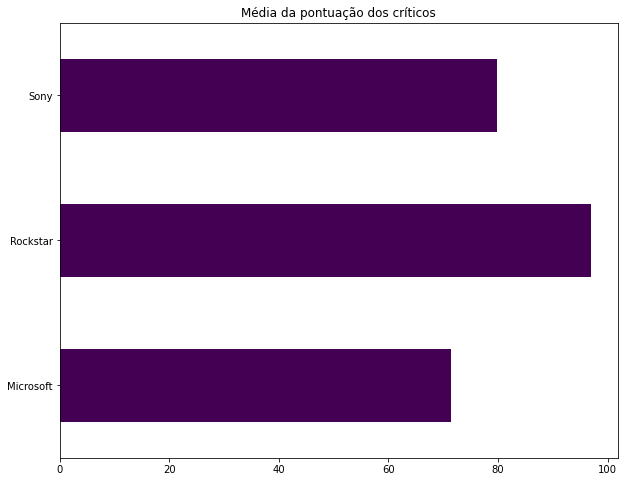

In [34]:

ax = companies_df.groupby(['publisher']).mean().plot(kind='barh', cmap='viridis', y='meta_critic_score', legend=False, 
                                                title='Média da pontuação dos críticos', figsize=(10,8))
ax.set_ylabel('')


plt.savefig('media_pontuacao_criticos.png')
plt.show()

# ax = companies_df.groupby(['publisher']).mean().plot(kind='barh',y='meta_user_score', legend=False, 
#                                                 title='Média da pontuação dos usuários', figsize=(10,8))
# ax.set_ylabel('')

# # plt.legend(False)
# plt.savefig('media_pontuacao_usuarios.png')
# plt.show()

In [60]:
companies_df.columns

Index(['rank_sales', 'game_name', 'publisher', 'developer', 'platform',
       'platform_name', 'global_sales', 'game_genre', 'meta_critic_score',
       'meta_user_score', 'release_day', 'release_month', 'release_year'],
      dtype='object')

In [63]:
companies_df[['meta_user_score']]

,meta_user_score
686,8.1
683,8.6
687,8.1
684,8.6
249,8.0
716,3.2
769,7.8
373,8.2
822,8.1
839,6.6


In [69]:
companies_df['meta_user_score'] = companies_df['meta_user_score'].astype('float64')

In [72]:
comp = companies_df.groupby(['publisher']).mean()
comp[['global_sales', 'meta_critic_score', 'meta_user_score']]

,global_sales,meta_critic_score,meta_user_score
publisher,,,
Microsoft,1017500.0,71.5,5.975
Rockstar,9855000.0,97.0,8.350
Sony,870000.0,79.8,7.720


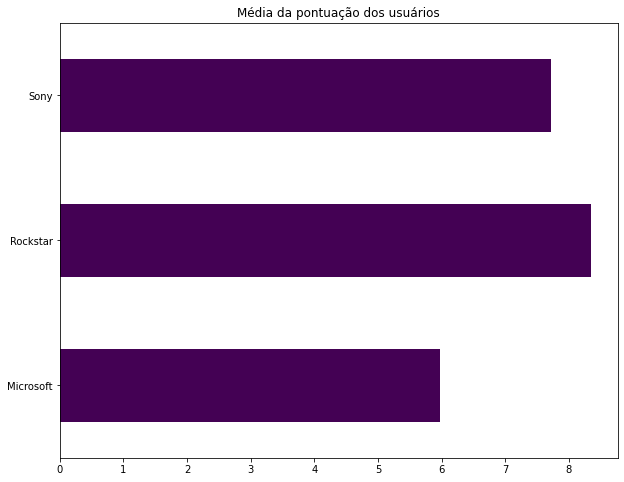

In [71]:

ax = companies_df.groupby(['publisher']).mean().plot(kind='barh', cmap='viridis', y='meta_user_score', legend=False, 
                                                title='Média da pontuação dos usuários', figsize=(10,8))
ax.set_ylabel('')


plt.savefig('media_pontuacao_usuarios.png')
plt.show()

# ax = companies_df.groupby(['publisher']).mean().plot(kind='barh',y='meta_user_score', legend=False, 
#                                                 title='Média da pontuação dos usuários', figsize=(10,8))
# ax.set_ylabel('')

# # plt.legend(False)
# plt.savefig('media_pontuacao_usuarios.png')
# plt.show()

In [100]:
# Sony, Microsoft, Rockstar e CD Projekt Red
sony = df[df['publisher'].str.contains(companies[0])]
sony = sony.loc[(sony['release_year'] <= 2018) & (sony['release_year'] > 2013)].sort_values(by='release_year', ascending=False)[:5]
# sony.dtypes
sony

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
769,245,Shadow of the Colossus,Sony Interactive Entertainment,Bluepoint Games,PS4,PlayStation 4,1200000.0,Action-Adventure,91,7.8,6,2,2018
249,147,Uncharted: The Lost Legacy,Sony Interactive Entertainment,Naughty Dog,PS4,PlayStation 4,2370000.0,Action,84,8.0,22,8,2017
822,375,Gravity Rush 2,Sony Interactive Entertainment,SIE Japan Studio,PS4,PlayStation 4,350000.0,Action-Adventure,80,8.1,20,1,2017
839,412,Robinson: The Journey,Sony Interactive Entertainment,Crytek,PS4,PlayStation 4,270000.0,Action-Adventure,64,6.6,8,11,2016
856,475,Gravity Rush Remastered,Sony Computer Entertainment,Bluepoint Games,PS4,PlayStation 4,160000.0,Action-Adventure,80,8.1,2,2,2016


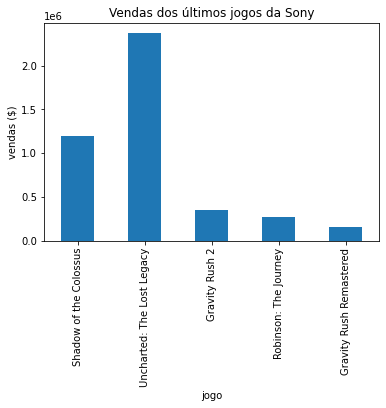

In [105]:
ax = sony.plot.bar(x='game_name', y='global_sales', title='Vendas dos últimos jogos da Sony', legend=False)
ax.set_xlabel('jogo')
ax.set_ylabel('vendas ($)')
plt.show()

In [112]:
microsoft = df[df['publisher'].str.contains(companies[1])]
microsoft = microsoft.dropna()
microsoft = microsoft.sort_values(by='release_year', ascending=False)[:5]
microsoft

,rank_sales,game_name,publisher,developer,platform,platform_name,global_sales,game_genre,meta_critic_score,meta_user_score,release_day,release_month,release_year
876,537,Disneyland Adventures,Microsoft Studios,Asobo Studio,XOne,Xbox One,70000.0,Action-Adventure,67,5.8,31,10,2017
840,420,ReCore,Microsoft Studios,Armature Studio,XOne,Xbox One,260000.0,Action-Adventure,63,6.7,13,9,2016
716,188,Kinect: Disneyland Adventures,Microsoft Studios,Frontier Developments,X360,Xbox 360,2410000.0,Action-Adventure,73,3.2,15,11,2011
373,283,Alan Wake,Microsoft Game Studios,Remedy Entertainment,X360,Xbox 360,1330000.0,Action,83,8.2,18,5,2010


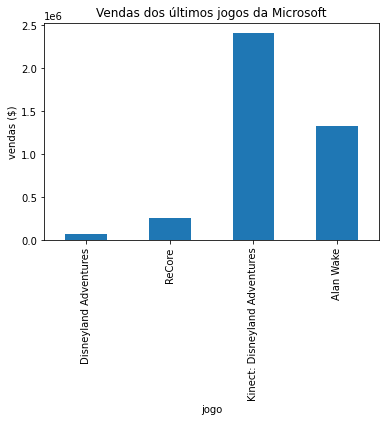

In [113]:
ax = microsoft.plot.bar(x='game_name', y='global_sales', title='Vendas dos últimos jogos da Microsoft', legend=False)
ax.set_xlabel('jogo')
ax.set_ylabel('vendas ($)')
plt.show()

0
0


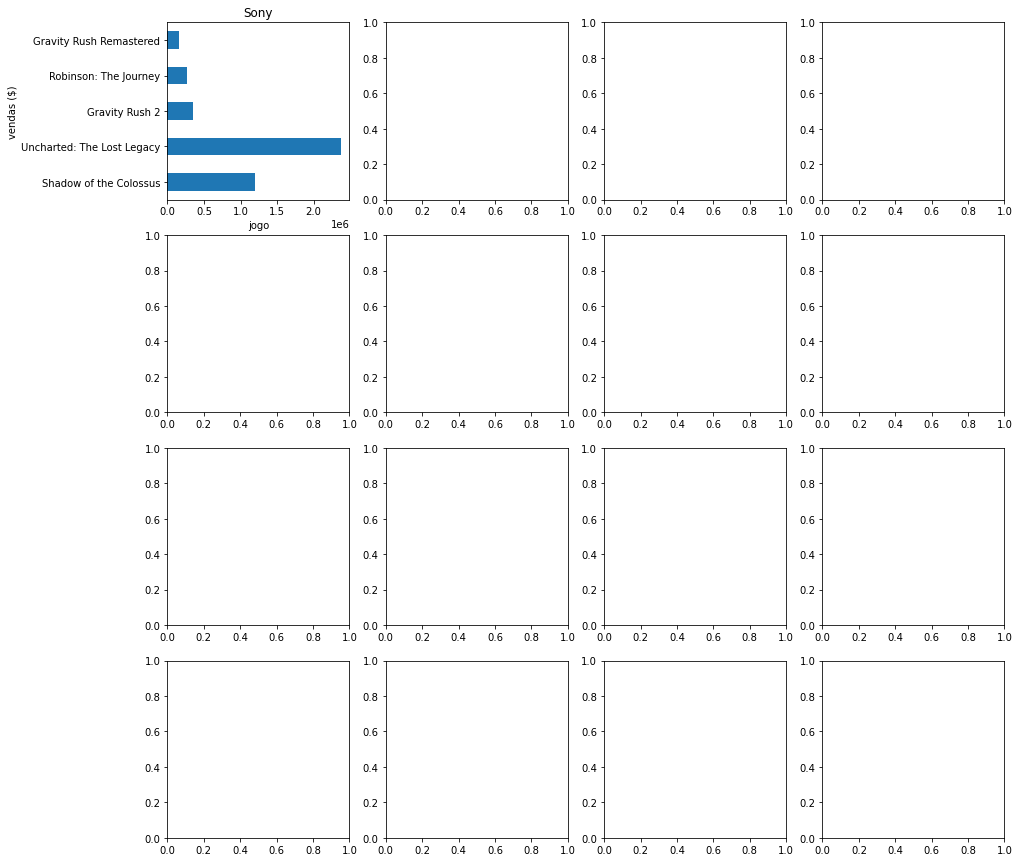

In [122]:
fig, axes = plt.subplots(len(companies), len(companies), figsize=(15,15))
c = 0
for i in range(1):
    print(i)
    for j in range(1):
        print(j)
        comp = pd.DataFrame(df.loc[df['publisher'].str.contains(companies[c])])
        comp = comp.loc[(comp['release_year'] <= 2018) & (comp['release_year'] > 2013)].sort_values(by='release_year', ascending=False)[:5]
        ax = comp.plot.barh(x='game_name', y='global_sales', title=f'{companies[c]}', legend=False, ax=axes[i, j])
        ax.set_xlabel('jogo')
        ax.set_ylabel('vendas ($)')
#         plt.show()
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title("main")
# axs[1, 0].plot(x, y**2)
# axs[1, 0].set_title("shares x with main")
# axs[1, 0].sharex(axs[0, 0])
# axs[0, 1].plot(x + 1, y + 1)
# axs[0, 1].set_title("unrelated")
# axs[1, 1].plot(x + 2, y + 2)
# axs[1, 1].set_title("also unrelated")
#         fig.tight_layout()

In [37]:
df.plot.bar(x='publisher', y='global_sales')

<AxesSubplot:xlabel='publisher'>

Error in callback <function flush_figures at 0x000001E11C182D30> (for post_execute):


KeyboardInterrupt: 

In [8]:
plt.bar(x=df['publisher'], height=df['global_sales'])

TypeError: no numeric data to plot